# Exploratory Data Analysis & Visualization

In this step, we explore the cleaned IMDB reviews dataset to understand:
- Distribution of sentiments
- Review lengths
- Most common words
- Word frequency patterns for positive and negative reviews
- Visual insights using barplots, boxplots, histograms, and word clouds

In [1]:
# Import libraries for data manipulation
import pandas as pd

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# For counting word frequencies
from collections import Counter

# For generating word clouds
from wordcloud import WordCloud

In [2]:
# Load cleaned IMDB reviews dataset
df = pd.read_csv("../Data/processed_data/cleaned_reviews.csv")

In [3]:
# Preview the first 5 rows
df.head()

,cleaned_text,sentiment
0,one reviewer mentioned watching oz episode you...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically there family little boy jake think t...,negative
4,petter matteis love time money visually stunni...,positive


In [4]:
# Create a new column 'review_length' that counts number of words in each review
df['review_length'] = df['cleaned_text'].apply(lambda x: len(x.split()))

In [5]:
# Preview some rows with the new feature
df.loc[21434:21444]

,cleaned_text,sentiment,review_length
21434,movie bad looked like home movie one scene cam...,negative,58
21435,warning potential viewer experimental film nat...,positive,132
21436,bit slow boring tale old man wife living delap...,positive,35
21437,although movie slow dreamlike almost mesmerizi...,negative,73
21438,dont recall walking movie theater except frien...,negative,40
21439,disappointed waiting year repeatsthe dvd origi...,negative,65
21440,always nice see angela bassett getting role re...,positive,107
21441,far providing caffeine kick youd expect film s...,negative,187
21442,okay film woman twin disturbing vision sister ...,negative,58
21443,set skenbart follows failed swedish book edito...,negative,156


In [6]:
# Calculate average, maximum, and minimum review lengths
average_length = df['review_length'].mean()
max_length = df['review_length'].max()
min_length = df['review_length'].min()

# Print basic statistics
print(f'Average Length: {average_length}')
print(f'Max Length: {max_length}')
print(f'Min Length: {min_length}')

Average Length: 118.60262
Max Length: 1420
Min Length: 3


C:\Users\MD Maruf\AppData\Local\Temp\ipykernel_25624\3900087227.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


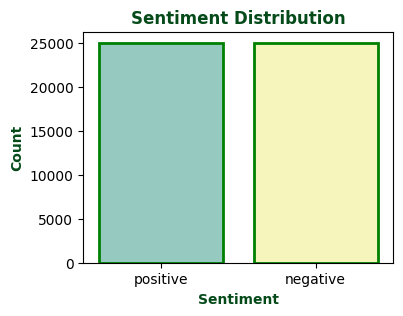

In [7]:
# Plot sentiment distribution using a barplot
plt.figure(figsize=(4,3))
sns.barplot(
    x=df['sentiment'].value_counts().index,  # x-axis: sentiment labels
    y=df['sentiment'].value_counts().values, # y-axis: counts
    palette='Set3',                           # bar colors
    edgecolor='green',                        # outline color
    linewidth=2                               # outline thickness
)
plt.title('Sentiment Distribution', color='#054B1A', fontweight='bold')  
plt.xlabel('Sentiment', color="#054B1A", fontweight='bold')            
plt.ylabel('Count', color='#054B1A', fontweight='bold')
plt.show()

### Dataset Overview: Sentiment Distribution**

The bar chart above visualizes the distribution of sentiments in the dataset.

* **Positive Sentiment:** 25,000 samples
* **Negative Sentiment:** 25,000 samples
* **Total Samples:** 50,000

**Observation:** The dataset is **perfectly balanced**, which ensures that the Machine Learning model will not be biased toward any specific class during the training process.

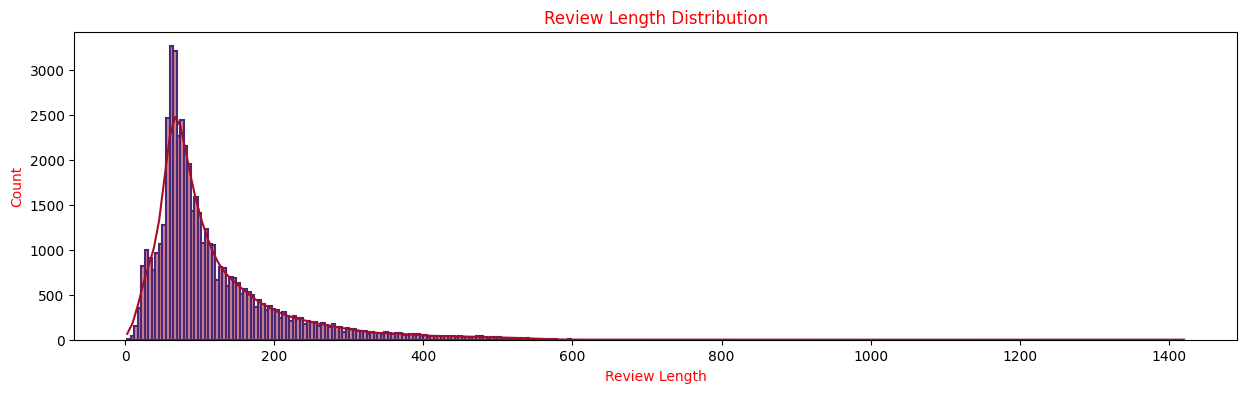

In [8]:
# Histogram to visualize distribution of review lengths
plt.figure(figsize=(15,4))
sns.histplot(
    data=df,
    x='review_length',
    bins=300,
    color="#A80C26",
    edgecolor="#492874",
    linewidth=1.5,
    kde=True  # Kernel Density Estimate to show distribution
)
plt.title('Review Length Distribution', color='red')
plt.xlabel('Review Length', color='red')
plt.ylabel('Count', color='red')
plt.show()

### Analysis of Review Length Distribution

This histogram shows the distribution of text lengths (word or character count) across the dataset.

* **Peak Frequency:** Most reviews are short, concentrated between **50 to 100** units in length.
* **Distribution Shape:** The data is **Right-Skewed** (Positive Skew), meaning while most reviews are short, there are a few very long reviews extending up to 1,400 units.
* **ML Insight:** Since the lengths vary significantly, **padding** or **truncation** will be necessary during preprocessing to ensure uniform input size for the Machine Learning model.

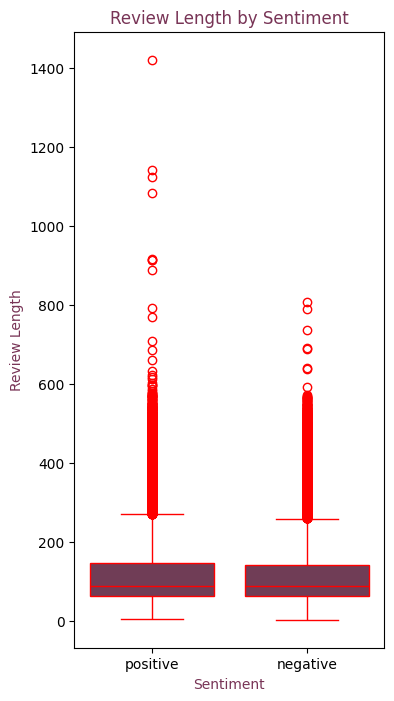

In [9]:
# Boxplot to compare review length across sentiments
plt.figure(figsize=(4,8))
sns.boxplot(
    data=df,
    x='sentiment',
    y='review_length',
    color='#783456',  # box color
    linecolor='red'   # line color
)
plt.title("Review Length by Sentiment", color='#783456')
plt.xlabel("Sentiment", color='#783456')
plt.ylabel('Review Length', color='#783456')
plt.show()

### **Analysis: Review Length by Sentiment (Box Plot)**

This box plot compares the distribution of review lengths between **Positive** and **Negative** sentiments.

* **Median Similarity:** The median review length is nearly identical for both sentiment classes, suggesting that the average word count does not significantly vary by sentiment.
* **Interquartile Range (IQR):** The central 50% of the data (the boxes) shows a similar spread, indicating consistency in how users structure typical reviews regardless of their opinion.
* **Outliers:** Both categories contain a large number of outliers (the red circles), representing exceptionally long reviews. 
* **Maximum Length:** The **Positive** sentiment category contains the longest reviews in the dataset, with some extending beyond **1,400 units**.

In [10]:
# Combine all reviews into a single string
all_text = " ".join(df['cleaned_text'])

In [11]:
# Split text into words and count frequency
all_words = all_text.split()
word_count = Counter(all_words)

# Get the top 40 most common words
most_common_word = word_count.most_common(40)
print(f'Top 40 most common words:\n{most_common_word}')

Top 40 most common words:
[('movie', 99023), ('film', 89807), ('one', 52676), ('like', 39790), ('time', 29394), ('good', 28617), ('character', 27573), ('get', 24434), ('even', 24286), ('story', 24227), ('would', 24001), ('make', 23564), ('see', 23494), ('really', 22904), ('scene', 20706), ('much', 18896), ('well', 18629), ('people', 17979), ('great', 17803), ('bad', 17673), ('also', 17491), ('show', 16870), ('first', 16844), ('dont', 16635), ('way', 16535), ('thing', 16083), ('made', 15414), ('could', 15142), ('think', 15080), ('life', 14394), ('go', 14285), ('know', 14075), ('watch', 13686), ('love', 13383), ('many', 13263), ('seen', 13097), ('actor', 13011), ('two', 12935), ('plot', 12886), ('say', 12854)]


C:\Users\MD Maruf\AppData\Local\Temp\ipykernel_25624\3873712001.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


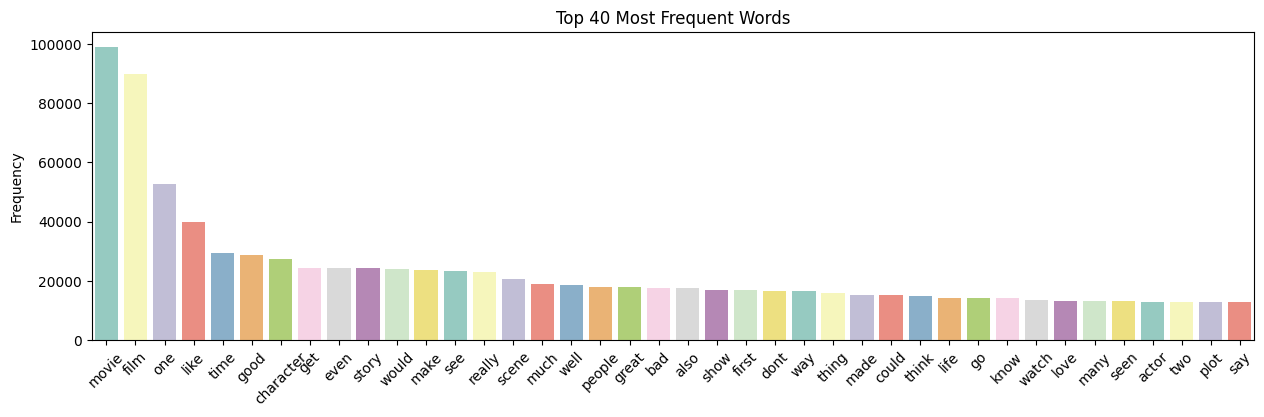

In [21]:
# Unpack words and their counts
words, count = zip(*most_common_word)

# Plot top 40 words
plt.figure(figsize=(15,4))
sns.barplot(
    x=words,
    y=count,
    palette = 'Set3',
    linewidth=2
)
plt.title("Top 40 Most Frequent Words")
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### **Analysis: Top 40 Most Frequent Words**

This bar chart displays the most commonly occurring words in the dataset to provide context on the textual content.

* **Dominant Keywords:** The words **"movie"** and **"film"** are the most frequent by a significant margin, appearing nearly **100,000** and **90,000** times respectively.
* **Contextual Relevance:** High-frequency words like "character," "story," "scene," and "actor" confirm that the dataset consists of cinematic reviews.
* **Common Terms:** Many frequent words (e.g., "one," "like," "good," "even") are common adjectives or neutral terms.

In [13]:
# Positive review words
positive_word = " ".join(df[df['sentiment']=='positive']['cleaned_text']).split()
pos_count = Counter(positive_word).most_common(15)

# Negative review words
negative_word = " ".join(df[df['sentiment']=='negative']['cleaned_text']).split()
neg_count = Counter(negative_word).most_common(15)

In [14]:
# Print top 15 words for each sentiment
print(f'Positive Top 15 Words: {pos_count}')
print(f'Negative Top 15 Words: {neg_count}')

Positive Top 15 Words: [('film', 47894), ('movie', 43133), ('one', 26958), ('like', 17541), ('time', 15196), ('good', 14420), ('story', 13647), ('character', 13630), ('great', 12694), ('see', 12532), ('get', 11095), ('well', 11080), ('make', 10988), ('really', 10676), ('also', 10553)]
Negative Top 15 Words: [('movie', 55890), ('film', 41913), ('one', 25718), ('like', 22249), ('even', 14921), ('time', 14198), ('good', 14197), ('bad', 14095), ('character', 13943), ('would', 13633), ('get', 13339), ('make', 12576), ('really', 12228), ('scene', 11013), ('see', 10962)]


## Word Frequency Insights

- Common words include 'movie', 'film', 'good', 'bad', etc.
- Positive and negative reviews show different word usage patterns.
- This insight can guide feature selection for sentiment classification.

In [15]:
# Function to generate a word cloud from text
def create_cloud(string, title=None):
    cloud = WordCloud(
        height=400,
        width=800,
        background_color="#85D495",
        min_font_size=10
    ).generate(string)

    plt.figure(figsize=(15,10))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    if title:
        plt.title(title, fontdict={'fontsize':18})
    plt.show()

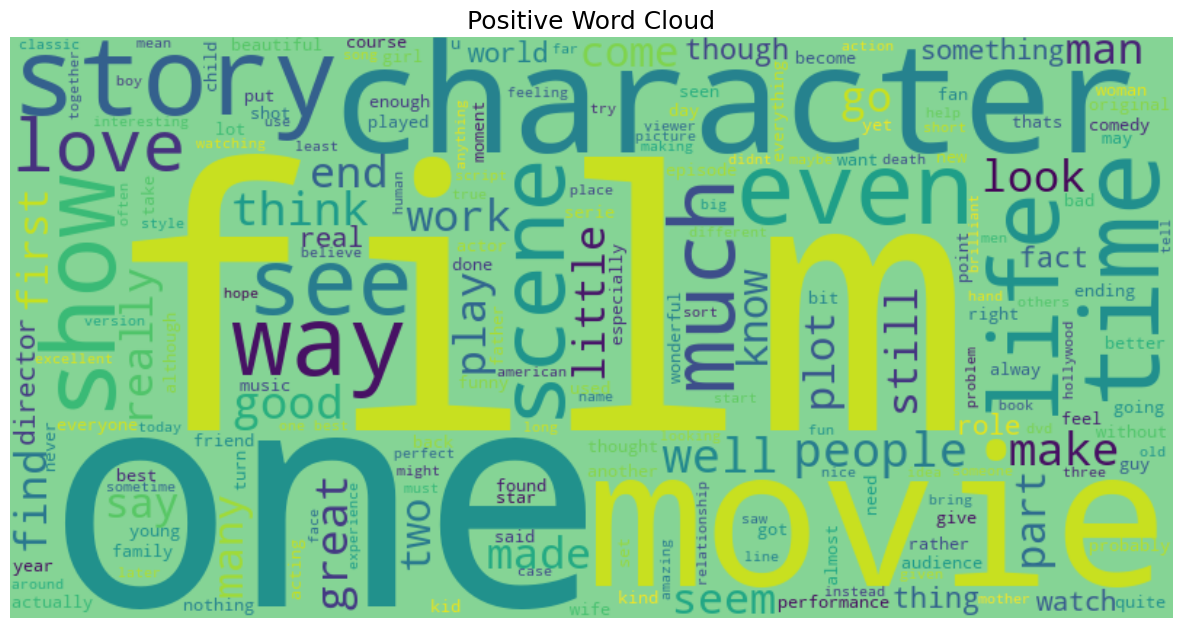

In [16]:
# Word cloud for positive reviews
create_cloud(" ".join(positive_word), "Positive Word Cloud")

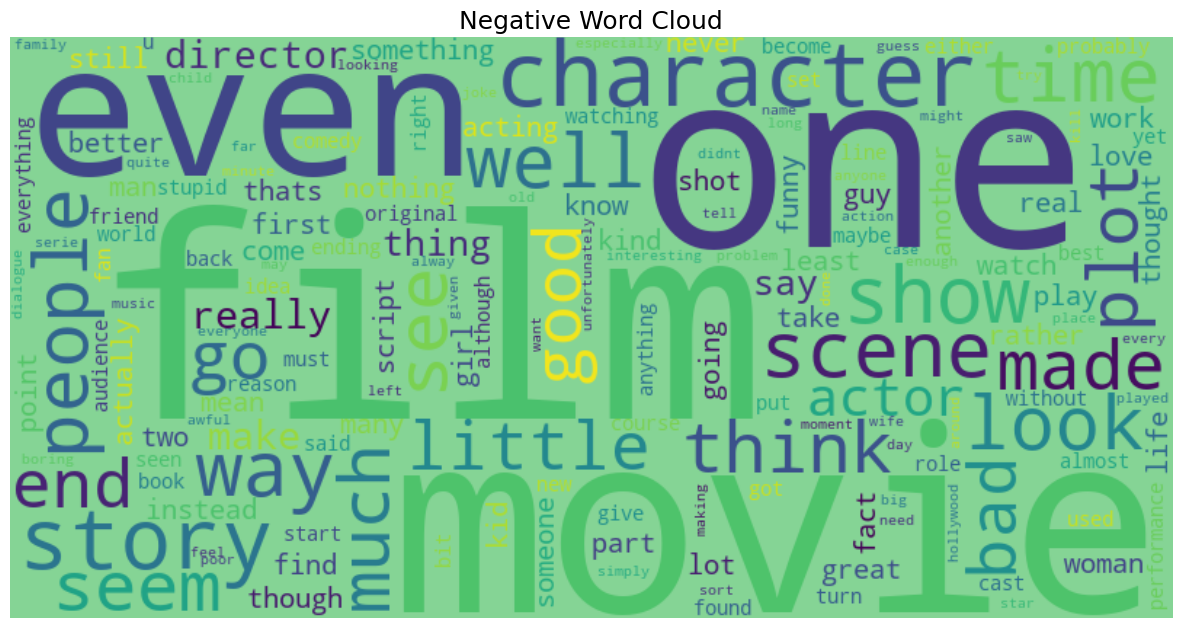

In [17]:
# Word cloud for negative reviews
create_cloud(" ".join(negative_word), "Negative Word Cloud")